In [709]:
import pandas as pd

# Reading the data sets


In [710]:
customer = pd.read_csv('customer.csv')
sales = pd.read_csv('Sales.csv')

# Merging the data using customer_id

In [711]:
customer_sales = pd.merge(sales, customer, on='customer_id', how='right')
print(customer_sales)

   sale_id  customer_id  amount        date     name region
0    101.0            1   250.0  2023-01-05    Alice  North
1    103.0            1   150.0  2023-02-01    Alice  North
2    105.0            1   100.0  2023-03-01    Alice  North
3    102.0            2   400.0  2023-01-07      Bob  South
4    104.0            3   300.0  2023-02-15  Charlie   East
5    106.0            3   200.0  2023-03-10  Charlie   East
6      NaN            4     NaN         NaN    David   West
7      NaN            5     NaN         NaN      Eve  North


# Total Sales per costumer :


In [712]:
df_total_sale_per_person = customer_sales.groupby('name')['amount'].sum()
print(df_total_sale_per_person)

name
Alice      500.0
Bob        400.0
Charlie    500.0
David        0.0
Eve          0.0
Name: amount, dtype: float64


# Find customers who made no sales :

In [713]:
no_sales = customer_sales[customer_sales['amount'].isnull()]['name'].tolist()
print(no_sales)

['David', 'Eve']


# Calculate the average sale amount per region


In [714]:
df_avg_sale_per_region = customer_sales.groupby('region')['amount'].mean()
print(df_avg_sale_per_region)

region
East     250.000000
North    166.666667
South    400.000000
West            NaN
Name: amount, dtype: float64


# Determine top 3 customers with highest total sales

In [715]:
top3 = df_total_sale_per_person.sort_values(ascending=False).head(3).index.tolist()
print(top3)

# in this type of tabel that has the names as indexes, we use .index to retrieve the indexes

['Alice', 'Charlie', 'Bob']


# Find the region with the lowest total sales 


In [716]:
total_sale_per_region = customer_sales.groupby('region')['amount'].sum()
print(total_sale_per_region)
low3 = total_sale_per_region.sort_values(ascending=False).tail(3).index.tolist()
print(low3)

region
East     500.0
North    500.0
South    400.0
West       0.0
Name: amount, dtype: float64
['North', 'South', 'West']


# Calculate monthly total sales trends

In [717]:
sales['date'] = pd.to_datetime(sales['date'])
months = sales['date'].dt.month
print('months :')
monthly_total_sales_trends = sales.groupby(months)['amount'].sum()
print(monthly_total_sales_trends)

months :
date
1    650
2    450
3    300
Name: amount, dtype: int64


# Visualize

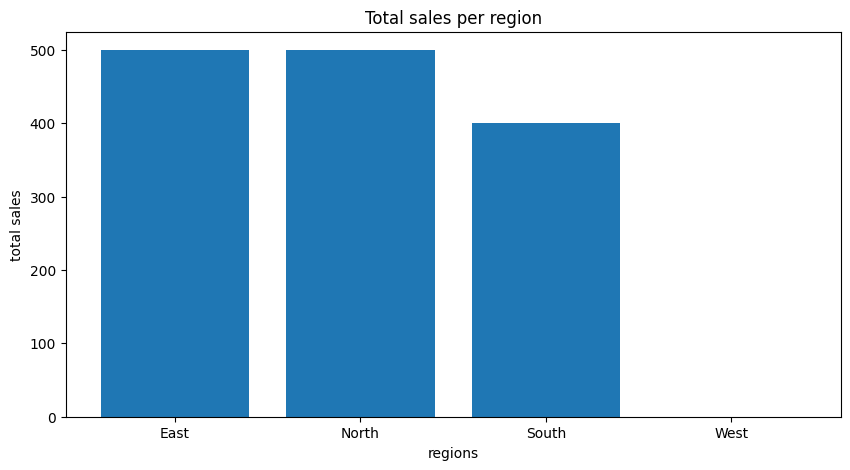

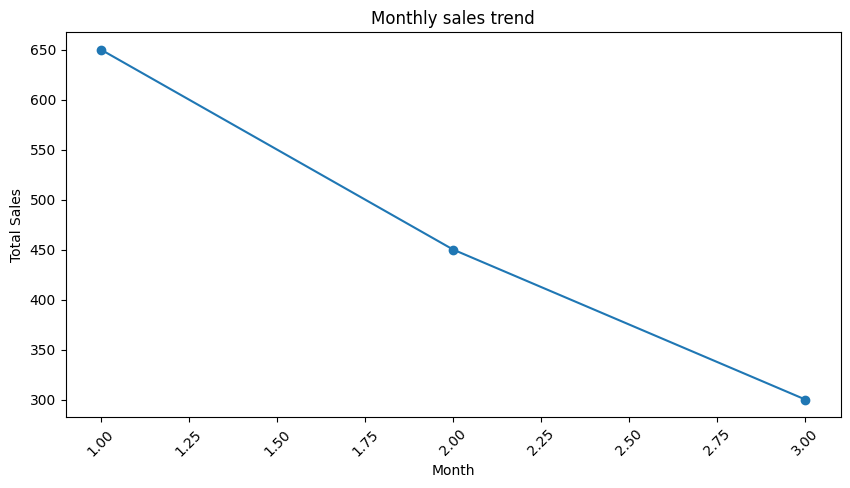

In [718]:
# total sales per region (bar chart)

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
plt.bar(total_sale_per_region.index.tolist(), total_sale_per_region.values.tolist())
plt.title('Total sales per region')
plt.xlabel('regions')
plt.ylabel('total sales')


# Monthly sales trend (line chart)

plt.figure(figsize=(10, 5))
monthly_total_sales_trends.plot(kind='line', marker='o')
plt.title('Monthly sales trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Identify outlier sales amounts (mean +- 2*std)

In [719]:
mean_amount = sales['amount'].mean()
std_amount = sales['amount'].std()

lower_threshold = mean_amount - 2 * std_amount
upper_threshold = mean_amount + 2 * std_amount

outliers = sales[(sales['amount'] < lower_threshold) | (sales['amount'] > upper_threshold)]
print("Outlier sales amounts:")
print(outliers['amount'])

Outlier sales amounts:
Series([], Name: amount, dtype: int64)


# (Introduction to ML) simple linear regression

Intercept: 408.3333333333333
Coefficient: -87.49999999999999


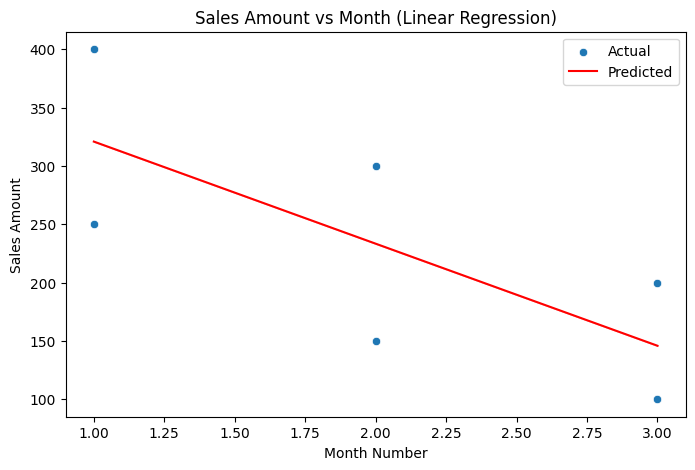

In [720]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Extract month number for regression
sales['date'] = pd.to_datetime(sales['date'])
sales['month_num'] = sales['date'].dt.month

X = sales[['month_num']]
y = sales['amount']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Predict and plot
sales['predicted_amount'] = model.predict(X)

plt.figure(figsize=(8,5))
sns.scatterplot(x='month_num', y='amount', data=sales, label='Actual')
sns.lineplot(x='month_num', y='predicted_amount', data=sales, color='red', label='Predicted')
plt.title('Sales Amount vs Month (Linear Regression)')
plt.xlabel('Month Number')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()
